# Projeto de Previsão de Atrito de Colaboradores com IA


**Meria Eloisa da Silva santos RM: 552294**

## EDA

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# !pip install numpy matplotlib seaborn plotly scikit-learn

In [3]:
# Importando os Dados
df = pd.read_csv('archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Temos uma distribuição maior de pessoas que não tem Atrito pela empresa.

C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py

C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
C:\Users\Magora\AppData\Local\Temp\ipykernel_18232\4111668162.py

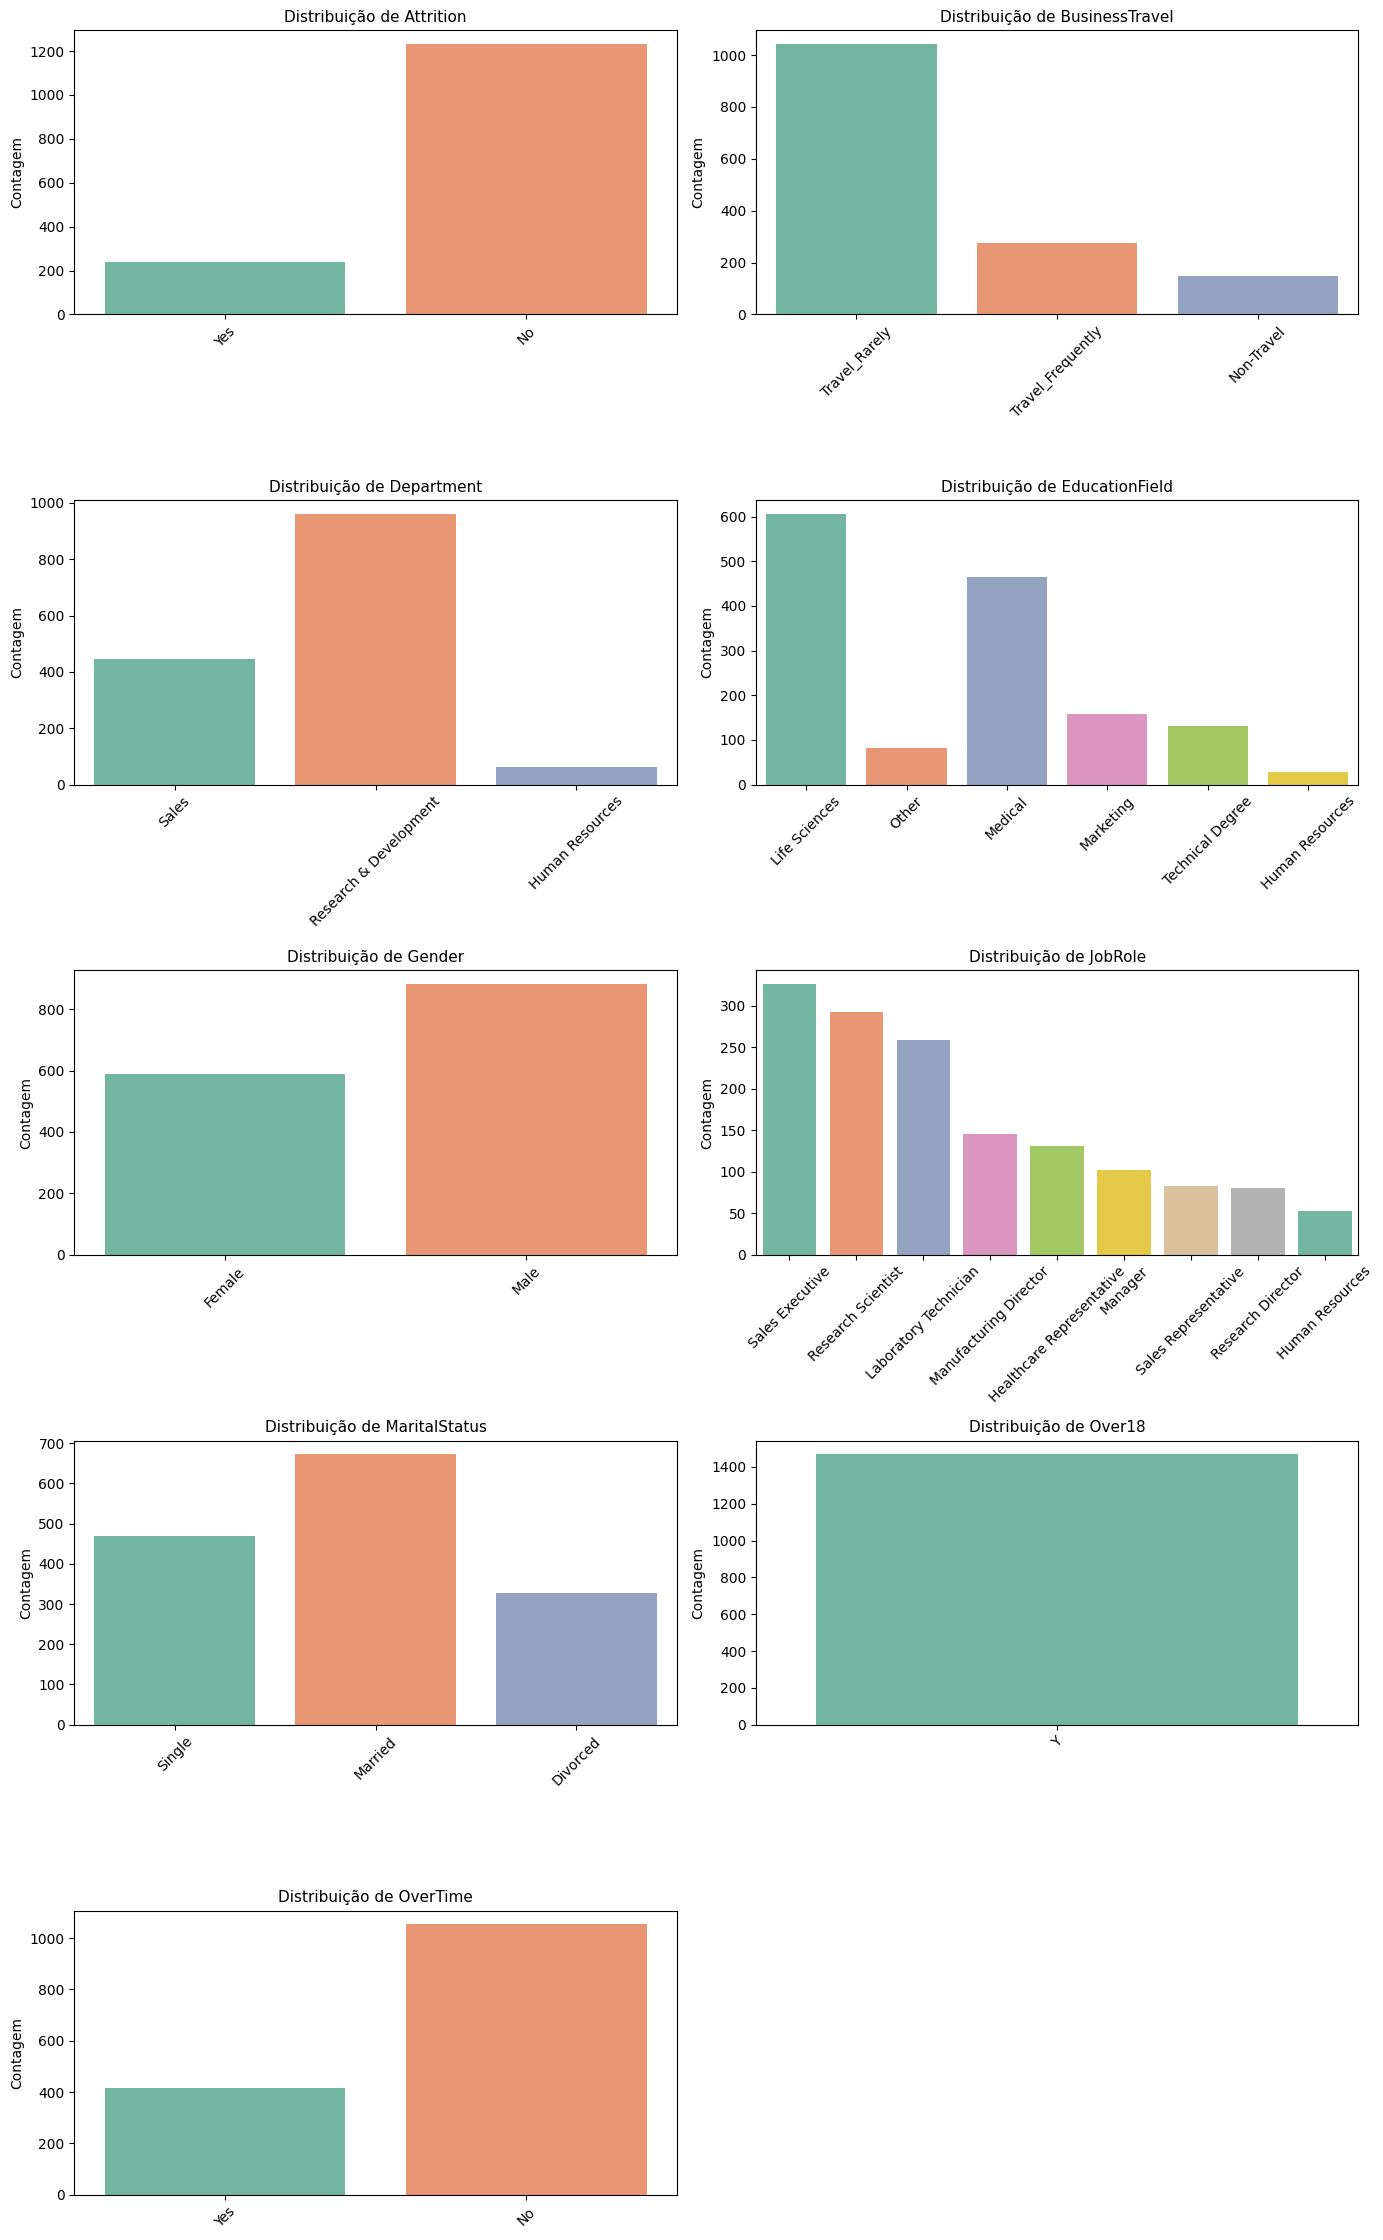

In [7]:
# Seleciona apenas as colunas do tipo object
categorical_cols = df.select_dtypes(include='object').columns

# Define tamanho da figura (ajusta conforme número de colunas)
num_cols = len(categorical_cols)
fig, axes = plt.subplots(
    nrows=(num_cols + 1) // 2,  # 2 gráficos por linha
    ncols=2,
    figsize=(14, num_cols * 2.5)
)

axes = axes.flatten()  # transforma em lista simples

# Cria um gráfico de barras para cada coluna categórica
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribuição de {col}', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=45)

# Remove eixos vazios se houver número ímpar de colunas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Hipotese 1 - A distância para ir ao trabalho, pode ser um fator potencial para que diminua a Atrito**

In [8]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [9]:
df.groupby('Attrition')['DistanceFromHome'].mean()

Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64

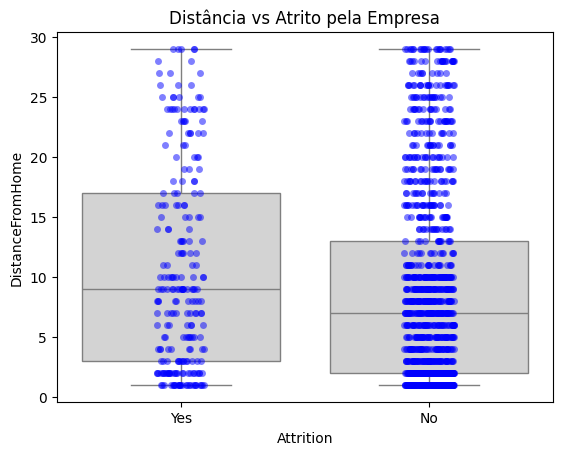

In [10]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, showfliers=False, color='lightgray')
sns.stripplot(x='Attrition', y='DistanceFromHome', data=df, color='blue', alpha=0.5)
plt.title('Distância vs Atrito pela Empresa')
plt.show()

In [11]:
df[df['DistanceFromHome'] >  8.915653]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6


In [12]:
df[df['DistanceFromHome'] >  10.632911]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6


In [13]:
df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [14]:
correlation = df['DistanceFromHome'].corr(df['Attrition_encoded'])
print(f'Correlação entre distância e attrition: {correlation:.3f}')

Correlação entre distância e attrition: 0.078


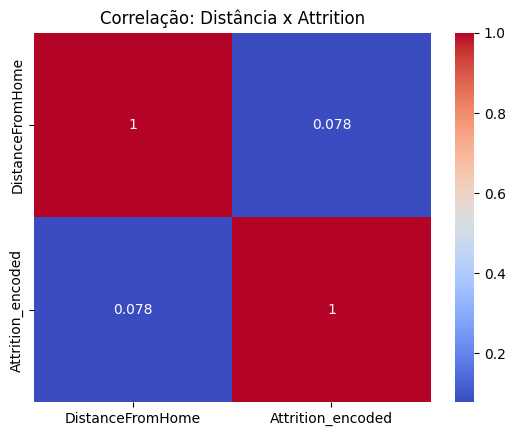

In [15]:
sns.heatmap(df[['DistanceFromHome', 'Attrition_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação: Distância x Attrition')
plt.show()

**Insight (Hipótese 1):** A `DistanceFromHome` apresentou correlação fraca com `Attrition` — isoladamente não é um forte preditor. Investigar subgrupos (por função, nível ou equilíbrio vida-trabalho) pode revelar efeitos locais.

**Hipotese 2 - O tempo de trabalho, pode ser um fator potencial para que diminua a Atrito**

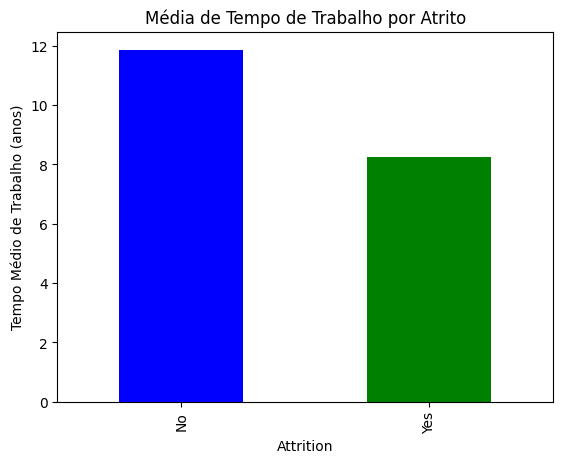

In [16]:
df.groupby('Attrition')['TotalWorkingYears'].mean().plot(kind='bar', color=['blue', 'green'])
plt.title('Média de Tempo de Trabalho por Atrito')
plt.ylabel('Tempo Médio de Trabalho (anos)')
plt.show()

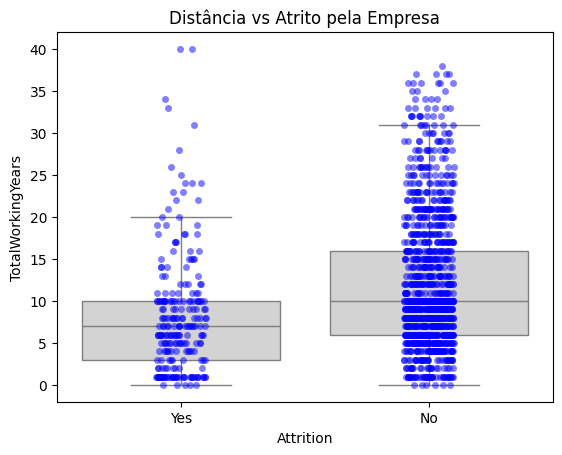

In [17]:
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, showfliers=False, color='lightgray')
sns.stripplot(x='Attrition', y='TotalWorkingYears', data=df, color='blue', alpha=0.5)
plt.title('Distância vs Atrito pela Empresa')
plt.show()


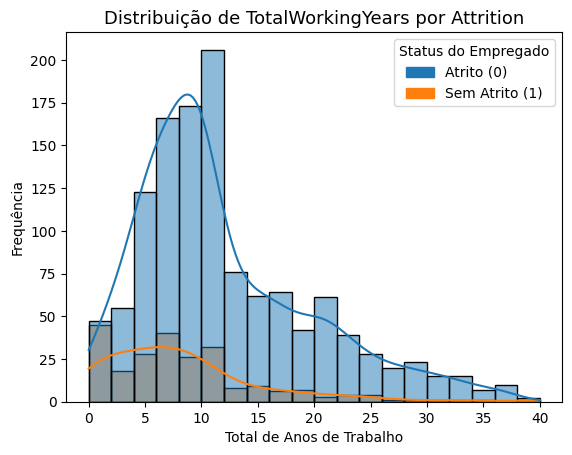

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define cores específicas para cada grupo
palette = {0: "#1f77b4", 1: "#ff7f0e"}  # azul e laranja

# Cria o histograma com curva KDE
ax = sns.histplot(
    data=df,
    x='TotalWorkingYears',
    hue='Attrition_encoded',
    kde=True,
    bins=20,
    palette=palette,
    alpha=0.5
)

# Títulos e eixos
plt.title('Distribuição de TotalWorkingYears por Attrition', fontsize=13)
plt.xlabel('Total de Anos de Trabalho')
plt.ylabel('Frequência')

# Cria legenda manual, garantindo que as cores batem
from matplotlib.patches import Patch
legend_labels = [
    Patch(color=palette[0], label='Atrito (0)'),
    Patch(color=palette[1], label='Sem Atrito (1)')
]
plt.legend(
    handles=legend_labels,
    title='Status do Empregado',
    loc='upper right'
)

plt.show()


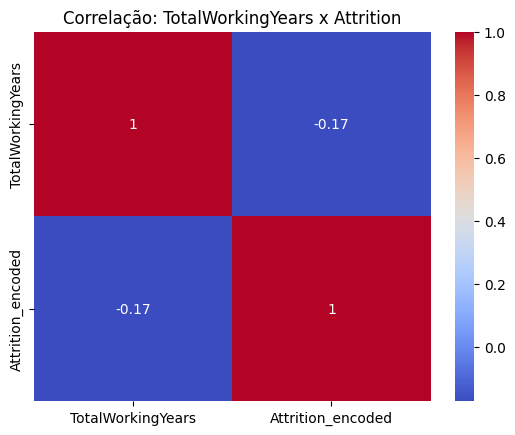

In [19]:
correlation = df['TotalWorkingYears'].corr(df['Attrition_encoded'])
sns.heatmap(df[['TotalWorkingYears', 'Attrition_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação: TotalWorkingYears x Attrition')
plt.show()

**Insight (Hipótese 2):** `TotalWorkingYears` mostra correlação fraca/negativa com `Attrition` no conjunto geral; contudo, faixas específicas (≈15–35 anos de experiência) apresentam maior insatisfação — recomenda-se segmentação por idade/cargo para ações de retenção.

**Hipótese 3 - Baixa satisfação + horas extras estão associadas a maior atrito**

Hipótese: colaboradores com baixa `JobSatisfaction` que fazem `OverTime` apresentam proporção maior de `Attrition` em comparação a quem não faz horas extras. Vamos visualizar a distribuição por nível de satisfação, separando por `Attrition` para comparar proporções.

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

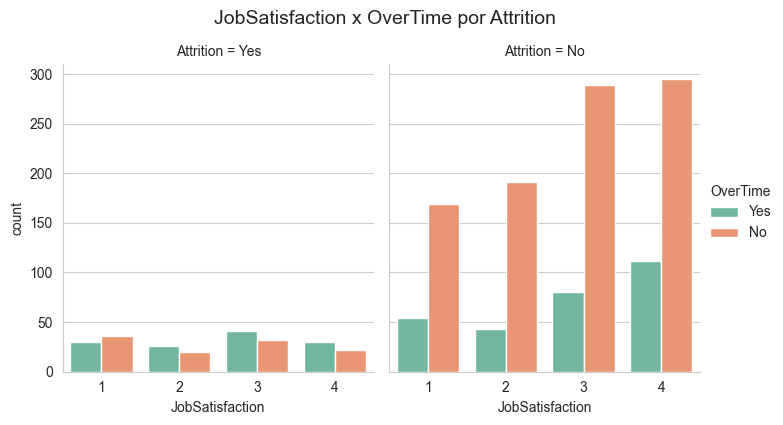

In [20]:
df
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.catplot(data=df, x='JobSatisfaction', hue='OverTime', col='Attrition', kind='count', height=4, aspect=0.9, palette='Set2')
plt.suptitle('JobSatisfaction x OverTime por Attrition', y=1.05, fontsize=14)
plt.show()

**Insight (Hipótese 3):** Observarmos uma proporção significativamente maior de colaboradores com `JobSatisfaction` baixa e `OverTime = Yes` no painel `Attrition = Yes`, isso indica que horas extras somadas à baixa satisfação são um driver relevante e uma possível alavanca de intervenção (ex.: revisão de carga/compensação, políticas de horas extras).

**Hipótese 4 - Longos períodos sem promoção + histórico de trocas de empresas aumentam risco quando combinados com menor remuneração**

Hipótese: colaboradores com alto `YearsSinceLastPromotion` e maior `NumCompaniesWorked`, combinados com `MonthlyIncome` relativamente baixo, apresentam maior probabilidade de `Attrition`. Visualizaremos a relação entre tempo desde a última promoção e número de empresas trabalhadas, usando o tamanho do ponto para representar `MonthlyIncome` e cor para `Attrition`.

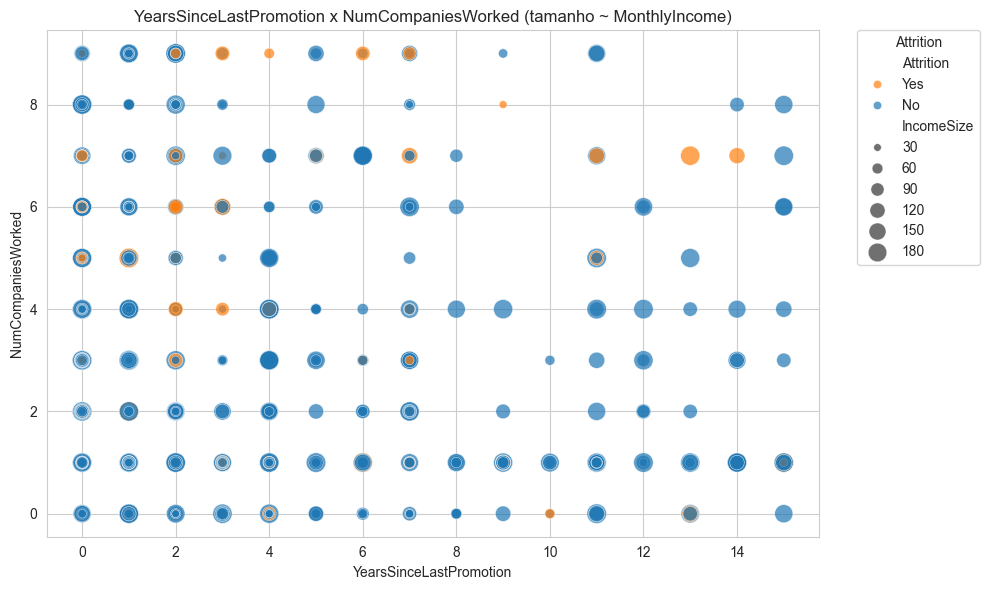

In [44]:
df_raw = pd.read_csv('archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
income = df_raw['MonthlyIncome']
sizes = 20 + 180 * (income - income.min()) / (income.max() - income.min())

df_plot = df_raw.copy()
df_plot['IncomeSize'] = sizes

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='YearsSinceLastPromotion',
    y='NumCompaniesWorked',
    hue='Attrition',
    size='IncomeSize',
    sizes=(20,200),
    alpha=0.7,
    palette={'Yes':'#ff7f0e','No':'#1f77b4'}
)

plt.title('YearsSinceLastPromotion x NumCompaniesWorked (tamanho ~ MonthlyIncome)')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('NumCompaniesWorked')

# LEGENDA FORA DO GRÁFICO
plt.legend(
    title='Attrition',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


**Insight (Hipótese 4):** O gráfico mostrar concentração de pontos com `Attrition = Yes` em regiões de `YearsSinceLastPromotion` alto e `NumCompaniesWorked` também alto — especialmente quando o tamanho dos pontos (renda) for menor — isso sugere que falta de progressão e histórico de mobilidade, combinados com remuneração menor, aumentam o risco de saída. Intervenções podem incluir planos de carreira, revisões salariais e oportunidades de promoção.

## Pré-processamento

In [22]:
# Encoding the 'Attrition' column to numerical values for analysis
df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.drop('Attrition', axis=1, inplace=True)

In [23]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(1470, 35)

In [26]:
# Seleciona as colunas do tipo object
object_cols = df.select_dtypes(include='object').columns

# Aplica o LabelEncoder em cada uma
le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col].astype(str))

list(object_cols)

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [27]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [28]:
# Excluindo variáveis identificadoras
cols_to_drop = ['EmployeeNumber', 'EmployeeCount']
df = df.drop(columns=cols_to_drop)

In [29]:
# Remove automaticamente colunas com apenas 1 valor único
const_cols = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=const_cols)
print("Colunas removidas automaticamente:", const_cols)

Colunas removidas automaticamente: ['Over18', 'StandardHours']


In [30]:
df['Attrition_encoded'].value_counts()

Attrition_encoded
0    1233
1     237
Name: count, dtype: int64

Isso significa que as classes estão desbalanceadas

In [31]:
X = df.drop('Attrition_encoded', axis=1)
y = df['Attrition_encoded']

In [32]:
# Oversampling

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [33]:
y_resampled.value_counts()

Attrition_encoded
1    1233
0    1233
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler


In [35]:
# Seleciona apenas colunas numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Cria o scaler
scaler = StandardScaler()

# Aplica o scaler nas colunas numéricas
X[num_cols] = scaler.fit_transform(X[num_cols])


In [36]:
X[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-3.504377e-17,1.00034,-2.072192,-0.758170,-0.101159,0.665354,2.526886
BusinessTravel,1470.0,-6.042030e-17,1.00034,-2.416437,-0.913194,0.590048,0.590048,0.590048
DailyRate,1470.0,5.075305e-17,1.00034,-1.736576,-0.836662,-0.001204,0.878877,1.726730
Department,1470.0,-1.353415e-16,1.00034,-2.389147,-0.493817,-0.493817,1.401512,1.401512
DistanceFromHome,1470.0,4.350262e-17,1.00034,-1.010909,-0.887515,-0.270544,0.593216,2.444129
Education,1470.0,7.008755e-17,1.00034,-1.868426,-0.891688,0.085049,1.061787,2.038524
EducationField,1470.0,3.866899e-17,1.00034,-1.688776,-0.937414,-0.186052,0.565311,2.068035
EnvironmentSatisfaction,1470.0,1.305078e-16,1.00034,-1.575686,-0.660531,0.254625,1.169781,1.169781
Gender,1470.0,4.350262e-17,1.00034,-1.224745,-1.224745,0.816497,0.816497,0.816497
HourlyRate,1470.0,1.691768e-16,1.00034,-1.766079,-0.880361,0.005356,0.878771,1.678377


In [37]:
plt.figure(figsize=(6,8))
sns.barplot(
    y=correlation_with_target.index,
    x=correlation_with_target.values,
    palette='viridis'
)
plt.title('Correlação com Attrition_encoded', fontsize=14)
plt.xlabel('Correlação')
plt.ylabel('Variável')
plt.show()


NameError: name 'correlation_with_target' is not defined

<Figure size 600x800 with 0 Axes>

## Modelagem

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_res, y_train_res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Cria DataFrame com os coeficientes
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance_lr.head(10))


                    Feature  Coefficient
21                 OverTime     0.947068
30           YearsAtCompany     0.933711
16            MaritalStatus     0.538932
19       NumCompaniesWorked     0.450505
32  YearsSinceLastPromotion     0.447794
3                Department     0.341733
4          DistanceFromHome     0.263044
10                   Gender     0.262041
6            EducationField     0.185873
18              MonthlyRate     0.158280


## Avaliação

**Utilizando LogisticRegression**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       255
           1       0.29      0.62      0.39        39

    accuracy                           0.75       294
   macro avg       0.61      0.69      0.62       294
weighted avg       0.84      0.75      0.78       294



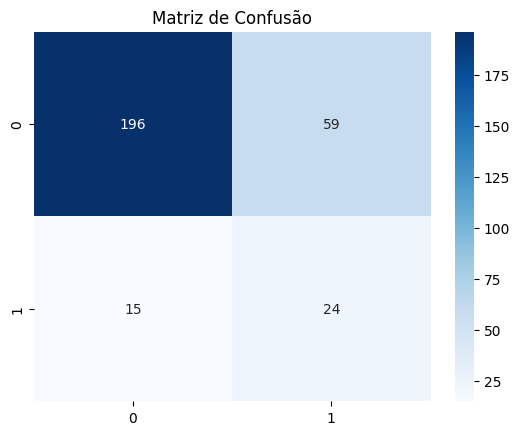

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()


## Interpretação

### **1. Interpretação dos Coeficientes (importância das variáveis)**

Os coeficientes mostram **quanto cada variável impacta na probabilidade de um funcionário sair da empresa (Attrition = 1)**, considerando que você usou uma regressão logística.

| Variável                            | Coeficiente                                                                                                                                |
| ----------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **OverTime (0.947)**                | É o fator mais influente. Funcionários que fazem horas extras têm **alta probabilidade de deixar a empresa**.                              |
| **YearsAtCompany (0.934)**          | Surpreendentemente alto — pode indicar que, após muitos anos, alguns funcionários tendem a buscar novas oportunidades (possível desgaste). |
| **MaritalStatus (0.539)**           | Estado civil pode influenciar a estabilidade — talvez solteiros troquem mais de emprego.                                                   |
| **NumCompaniesWorked (0.451)**      | Quanto mais empresas a pessoa já trabalhou, **maior a chance de sair novamente**. Faz sentido: histórico de alta rotatividade.             |
| **YearsSinceLastPromotion (0.448)** | Quanto mais tempo sem promoção, **maior a chance de sair**. Mostra insatisfação com o crescimento.                                         |
| **Department (0.342)**              | Pode haver departamentos com maior rotatividade (ex: Vendas ou RH).                                                                        |
| **DistanceFromHome (0.263)**        | Quanto maior a distância, **maior a probabilidade de saída**.                                                                              |
| **Gender (0.262)**                  | Pequeno impacto, mas pode indicar leve diferença entre gêneros na taxa de saída.                                                           |
| **EducationField (0.186)**          | Certas áreas de formação podem ter mais rotatividade (por exemplo, TI costuma ser alta).                                                   |
| **MonthlyRate (0.158)**             | Valor baixo indica pouca influência do salário mensal sobre a decisão de sair, **comparado a fatores comportamentais e de tempo**.         |

### **2. Insights dos Dados**

- A decisão de um funcionário sair está levemente associada a fatores individuais e contextuais — como distância, carga de trabalho, histórico profissional e tempo sem reconhecimento

- Funcionários que precisam se deslocar muito, têm carga alta ou trabalham horas extras podem sentir fadiga e menor equilíbrio entre vida pessoal e profissional. Isso reduz o vínculo com a empresa e aumenta o risco de saída.

- NumCompaniesWorked, YearsSinceLastPromotion, JobRole : Esses indicadores sugerem expectativas de crescimento. Pessoas que já trocaram de empresa antes e que estão há muito tempo sem promoção podem ter o hábito ou desejo de buscar novas oportunidades. O tipo de cargo (JobRole) também pode indicar áreas mais suscetíveis à rotatividade como em vendas e TI.

### **3. Valor para empresa/negócio**

**Valor para a Empresa / Negócio**

- **Identificação Proativa de Risco:** Permite antecipar colaboradores com maior probabilidade de saída (mesmo com classes desbalanceadas), possibilitando intervenções dirigidas — conversas de retenção, planos de desenvolvimento ou ajustes de jornada — antes que o desligamento ocorra.

- **Redução de Custos de Turnover:** A redução do turnover diminui gastos diretos (contratação, seleção, treinamento) e indiretos (perda de produtividade e know‑how). Modelos que priorizam intervenções em grupos de maior risco ajudam a maximizar o retorno sobre o investimento em retenção.

- **Ações Baseadas em Evidências e Prioritização:** Identifica fatores acionáveis (ex.: OverTime, YearsSinceLastPromotion, DistanceFromHome, WorkLifeBalance, JobSatisfaction) e permite priorizar iniciativas onde o impacto esperado é maior.

- **Segmentação de Intervenções:** Classifica risco por departamento, função e nível, otimizando alocação de recursos de RH para áreas com maior probabilidade de redução de turnover por intervenção específica.

- **Métricas para Monitoramento:** Suporta dashboards com KPIs operacionais (taxa de risco médio por unidade, redução de turnover pós-intervenção, custo evitado estimado, taxa de retenção por iniciativa) para acompanhamento contínuo das ações.

- **Avaliação de Ações (experimentação):** Facilita testes controlados (A/B) de iniciativas de retenção e mede o efeito real sobre a permanência, permitindo aprendizado rápido e escalonamento das melhores práticas.

- **Transparência e Adoção (explicabilidade):** Ferramentas de explicabilidade (ex.: SHAP) tornam os drivers de risco compreensíveis para gestores, aumentando a confiança nas recomendações e estimulando decisões colaborativas entre RH e liderança.

- **Cultura Data‑Driven em People Analytics:** Integra dados operacionais de RH a decisões estratégicas, transformando sinais de bem‑estar e desempenho em ações mensuráveis que impactam retenção e produtividade.